In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

### CSV

In [29]:
bank_train_csv = "data/processed/bank_train.csv"
bank_test_csv = "data/processed/bank_test.csv"
bank_val_csv = "data/processed/bank_val.csv"

labels_train = "data/processed/bank_train_labels.csv"
labels_test = "data/processed/bank_test_labels.csv"
labels_val = "data/processed/bank_val_labels.csv"

### Labels

In [31]:
labels_train_data = pd.read_csv(labels_train)
labels_train_data.drop(labels_train_data.columns[0], axis=1, inplace=True)

labels_test_data = pd.read_csv(labels_test)
labels_test_data.drop(labels_test_data.columns[0], axis=1, inplace=True)

labels_val_data = pd.read_csv(labels_val)
labels_val_data.drop(labels_val_data.columns[0], axis=1, inplace=True)

### Features

In [33]:
bank_train_data = pd.read_csv(bank_train_csv)
bank_test_data = pd.read_csv(bank_test_csv)
bank_val_data = pd.read_csv(bank_val_csv)

bank_train_data.drop(bank_train_data.columns[0], axis=1, inplace=True)
bank_test_data.drop(bank_test_data.columns[0], axis=1, inplace=True)
bank_val_data.drop(bank_val_data.columns[0], axis=1, inplace=True)

#### Combining test and validation data

In [43]:
x_test = pd.concat([bank_test_data, bank_val_data], ignore_index=True)
y_test = pd.concat([labels_test_data, labels_val_data], ignore_index=True)

### Logistic Regression

In [106]:
log_reg = LogisticRegression(class_weight='balanced')

history = log_reg.fit(bank_train_data, labels_train_data["target"])

In [107]:
y_pred = log_reg.predict(x_test)

probabilities = log_reg.predict_proba(x_test)

### Custom Threshold

In [108]:
positive_prob = probabilities[:,1]

threshold = 0.2

custom_predictions = (positive_prob > threshold).astype(int)

In [109]:
confusionMatrix = confusion_matrix(y_test, y_pred)
confusionMatrixNorm = confusion_matrix(y_test, y_pred, normalize='pred')

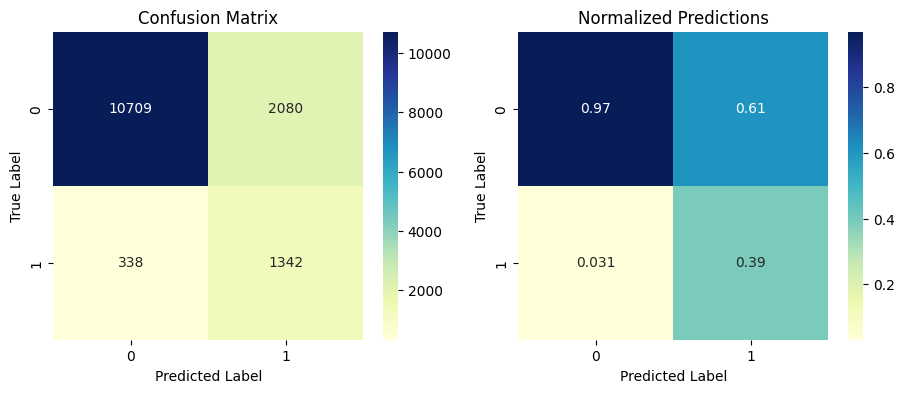

In [110]:
fig, axes = plt.subplots(1,2, figsize=(11,4))

sns.heatmap(confusionMatrix, annot=True, ax=axes[0], cmap='YlGnBu', fmt="d")
axes[0].set_title("Confusion Matrix")
axes[0].set_ylabel("True Label")
axes[0].set_xlabel("Predicted Label")

sns.heatmap(confusionMatrixNorm, annot=True, cmap='YlGnBu', ax=axes[1])
axes[1].set_title("Normalized Predictions")
axes[1].set_ylabel("True Label")
axes[1].set_xlabel("Predicted Label")

plt.show()

### Classification Report

In [111]:
target_names = ['Unsuccessful', 'Successful']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Unsuccessful       0.97      0.84      0.90     12789
  Successful       0.39      0.80      0.53      1680

    accuracy                           0.83     14469
   macro avg       0.68      0.82      0.71     14469
weighted avg       0.90      0.83      0.86     14469



### ROC Curve

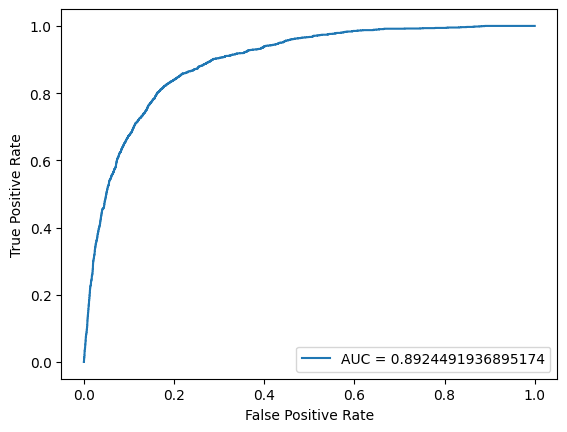

In [112]:
y_pred_proba = log_reg.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC = "+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()